In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import cv2
import zipfile
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

# **Data Review**

In [ ]:
!unzip '/content/drive/MyDrive/students_data_set.zip' -d extracted_files

Archive:  /content/drive/MyDrive/students_data_set.zip
   creating: extracted_files/students_data_set/Abir/
 extracting: extracted_files/students_data_set/Abir/Abir.6.3051.1.jpg  
 extracting: extracted_files/students_data_set/Abir/Abir.6.3051.10.jpg  
 extracting: extracted_files/students_data_set/Abir/Abir.6.3051.100.jpg  
 extracting: extracted_files/students_data_set/Abir/Abir.6.3051.101.jpg  
 extracting: extracted_files/students_data_set/Abir/Abir.6.3051.11.jpg  
 extracting: extracted_files/students_data_set/Abir/Abir.6.3051.12.jpg  
 extracting: extracted_files/students_data_set/Abir/Abir.6.3051.13.jpg  
 extracting: extracted_files/students_data_set/Abir/Abir.6.3051.14.jpg  
 extracting: extracted_files/students_data_set/Abir/Abir.6.3051.15.jpg  
 extracting: extracted_files/students_data_set/Abir/Abir.6.3051.16.jpg  
 extracting: extracted_files/students_data_set/Abir/Abir.6.3051.17.jpg  
 extracting: extracted_files/students_data_set/Abir/Abir.6.3051.18.jpg  
 extracting: ex

In [ ]:
img=cv2.imread('/content/extracted_files/students_data_set/Nipa/Nipa.20.1421.1.jpg')

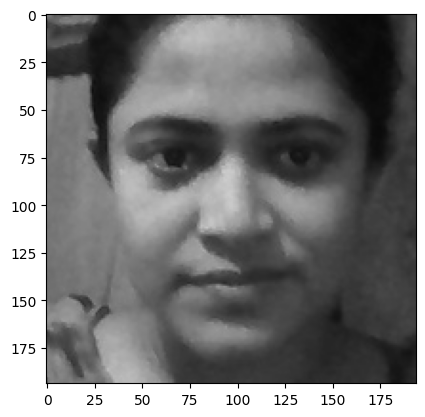

In [ ]:
plt.imshow(img)

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(194, 194)

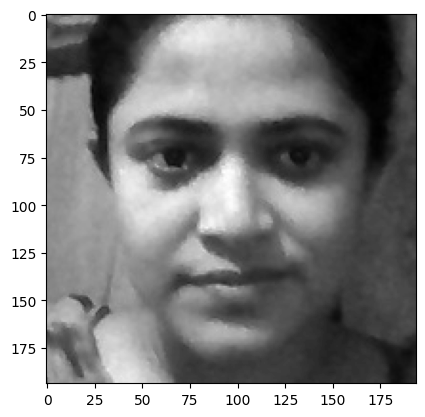

In [ ]:
plt.imshow(gray, cmap='gray')

# **Face Detection**

In [ ]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

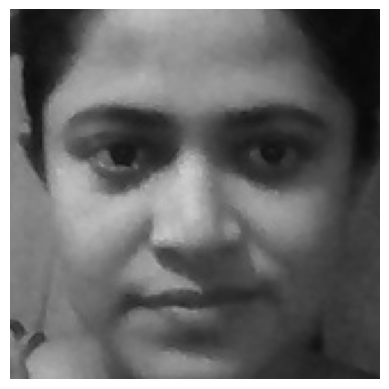

In [ ]:
# Load the image
image = cv2.imread('/content/extracted_files/students_data_set/Nipa/Nipa.20.1421.1.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect faces
face = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Iterate over detected faces
for (x, y, w, h) in face:
    # Crop the face from the image
    face = image[y:y+h, x:x+w]

    # Detect eyes within the face region
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = image[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    if len(eyes) >= 2:
        # Display the cropped face where both eyes are visible.
      plt.imshow(cv2.cvtColor(face, cv2.COLOR_BGR2RGB))
      plt.axis('off')
      plt.show()

# **Generating Data For Traing and Test**

In [ ]:
path_to_data = "/content/extracted_files/students_data_set"
path_to_cr_data = "/content/drive/MyDrive/Students_cropped"

In [ ]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [ ]:
img_dirs

['/content/extracted_files/students_data_set/Sabiqul',
 '/content/extracted_files/students_data_set/Tamim',
 '/content/extracted_files/students_data_set/Tama',
 '/content/extracted_files/students_data_set/Hemel',
 '/content/extracted_files/students_data_set/Alia_Bhutt',
 '/content/extracted_files/students_data_set/Abir',
 '/content/extracted_files/students_data_set/Tarup',
 '/content/extracted_files/students_data_set/Fahim',
 '/content/extracted_files/students_data_set/Rupak',
 '/content/extracted_files/students_data_set/Nipa',
 '/content/extracted_files/students_data_set/Shepon']

In [ ]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [ ]:
# function for get face
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

In [ ]:
# Genertaing Data of Faces
cropped_image_dirs = []
student_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    student_name = img_dir.split('/')[-1]
    student_file_names_dict[student_name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + student_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = student_name + str(count) + ".jpg"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            student_file_names_dict[student_name].append(cropped_file_path)
            count += 1

Generating cropped images in folder:  /content/drive/MyDrive/students_croppedSabiqul
Generating cropped images in folder:  /content/drive/MyDrive/students_croppedTama
Generating cropped images in folder:  /content/drive/MyDrive/students_croppedHemel
Generating cropped images in folder:  /content/drive/MyDrive/students_croppedAlia_Bhutt
Generating cropped images in folder:  /content/drive/MyDrive/students_croppedAbir
Generating cropped images in folder:  /content/drive/MyDrive/students_croppedTarup
Generating cropped images in folder:  /content/drive/MyDrive/students_croppedFahim
Generating cropped images in folder:  /content/drive/MyDrive/students_croppedRupak
Generating cropped images in folder:  /content/drive/MyDrive/students_croppedNipa
Generating cropped images in folder:  /content/drive/MyDrive/students_croppedShepon


# **Feature Extraction**

In [ ]:
# wavelet Transformation
import pywt


def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)
    imArray /= 255;
    # compute coefficients
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)
    coeffs_H[0] *= 0;

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

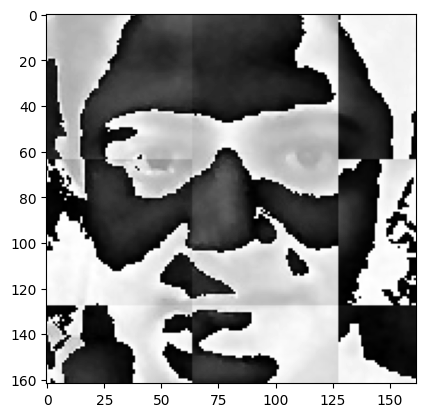

In [ ]:
im_har = w2d(face,'haar',6)
plt.imshow(im_har, cmap='gray')

In [ ]:
!pip install Pillow

In [ ]:
cropped_image_dirs=['/content/extracted_files/students_data_set/Sabiqul',
 '/content/extracted_files/students_data_set/Tamim',
 '/content/extracted_files/students_data_set/Tama',
 '/content/extracted_files/students_data_set/Hemel',
 '/content/extracted_files/students_data_set/Alia_Bhutt',
 '/content/extracted_files/students_data_set/Abir',
 '/content/extracted_files/students_data_set/Tarup',
 '/content/extracted_files/students_data_set/Fahim',
 '/content/extracted_files/students_data_set/Rupak',
 '/content/extracted_files/students_data_set/Nipa',
 '/content/extracted_files/students_data_set/Shepon']

In [ ]:
student_file_names_dict = {}
for img_dir in cropped_image_dirs:
    student_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    student_file_names_dict[student_name] = file_list
student_file_names_dict

{'Sabiqul': ['/content/extracted_files/students_data_set/Sabiqul/Sabiqul.1.1476.16.jpg',
  '/content/extracted_files/students_data_set/Sabiqul/Sabiqul.1.1476.74.jpg',
  '/content/extracted_files/students_data_set/Sabiqul/Sabiqul.1.1476.4.jpg',
  '/content/extracted_files/students_data_set/Sabiqul/Sabiqul.1.1476.3.jpg',
  '/content/extracted_files/students_data_set/Sabiqul/Sabiqul.1.1476.89.jpg',
  '/content/extracted_files/students_data_set/Sabiqul/Sabiqul.1.1476.75.jpg',
  '/content/extracted_files/students_data_set/Sabiqul/Sabiqul.1.1476.54.jpg',
  '/content/extracted_files/students_data_set/Sabiqul/Sabiqul.1.1476.7.jpg',
  '/content/extracted_files/students_data_set/Sabiqul/Sabiqul.1.1476.95.jpg',
  '/content/extracted_files/students_data_set/Sabiqul/Sabiqul.1.1476.22.jpg',
  '/content/extracted_files/students_data_set/Sabiqul/Sabiqul.1.1476.65.jpg',
  '/content/extracted_files/students_data_set/Sabiqul/Sabiqul.1.1476.41.jpg',
  '/content/extracted_files/students_data_set/Sabiqul/Sa

In [ ]:
class_dict = {}
count = 0
for student_name in student_file_names_dict.keys():
    class_dict[student_name] = count
    count = count + 1
class_dict

{'Sabiqul': 0,
 'Tamim': 1,
 'Tama': 2,
 'Hemel': 3,
 'Alia_Bhutt': 4,
 'Abir': 5,
 'Tarup': 6,
 'Fahim': 7,
 'Rupak': 8,
 'Nipa': 9,
 'Shepon': 10}

# **Trying Machine Learning first**

In [ ]:
X, y = [], []
for student_name, training_files in student_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[student_name])

In [ ]:
type(X)

list

In [ ]:

X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(1035, 4096)

In [ ]:
X

array([[ 35.,  35.,  35., ...,  64.,  64.,   0.],
       [ 67.,  67.,  67., ...,  42.,  43., 142.],
       [ 40.,  40.,  40., ...,  53.,   8.,   0.],
       ...,
       [ 29.,  29.,  29., ..., 189., 248.,  12.],
       [ 53.,  53.,  53., ..., 243., 226., 100.],
       [ 36.,  36.,  36., ..., 246.,  51., 134.]])

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

1.0

In [ ]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        25
           3       1.00      1.00      1.00        27
           4       1.00      1.00      1.00        15
           5       1.00      1.00      1.00        21
           6       1.00      1.00      1.00        29
           7       1.00      1.00      1.00        20
           8       1.00      1.00      1.00        37
           9       1.00      1.00      1.00        25
          10       1.00      1.00      1.00        22

    accuracy                           1.00       259
   macro avg       1.00      1.00      1.00       259
weighted avg       1.00      1.00      1.00       259



**Deep Learning**

In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
X,y=[],[]
for stud, images in student_file_names_dict.items():
    for image in images:
        img = cv2.imread(image)
        resized_img = cv2.resize(img, (128, 128))  # Resize the image
        nor_img = resized_img / 255.0  # Normalize the resized image
        X.append(nor_img)
        y.append(class_dict[stud])

In [ ]:
len(X)

1035

In [ ]:
from sklearn.utils import shuffle

X, y = shuffle(X, y, random_state=42)

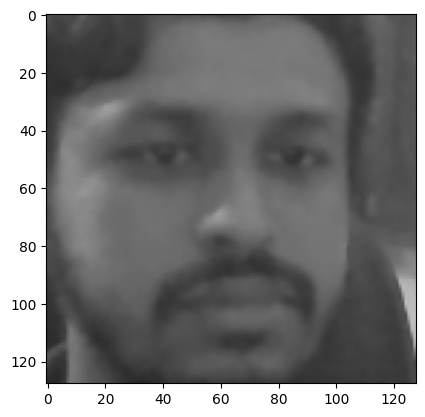

In [ ]:
plt.imshow(X[46])

In [ ]:

y[46]

7

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
X_stacked = np.stack(X_train)
X_reshaped = X_stacked.reshape(-1, 128, 128, 3)
X_train = X_reshaped.astype('float32')

In [ ]:
X_train.shape

(776, 128, 128, 3)

In [ ]:

y_train=np.array(y_train)
y_test=np.array(y_test)

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
from tensorflow.keras import Sequential,models,layers,regularizers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten,Dense

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(6, activation='softmax')  # Number of classes as the output layer
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 128)       0

In [ ]:
import numpy as np
unique_labels = np.unique(y_train)
print(unique_labels)

[-1  0  1  2  3  4  5  6  7  8  9]


In [ ]:
y_train = np.clip(y_train - 1, 0, 5)
y_test = np.clip(y_test - 1, 0, 5)

In [ ]:
history=model.fit(X_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
20/20 [==============================] - 73s 4s/step - loss: 1.4551 - accuracy: 0.4661 - val_loss: 1.1666 - val_accuracy: 0.6795
Epoch 2/10
20/20 [==============================] - 23s 1s/step - loss: 0.7713 - accuracy: 0.7177 - val_loss: 0.5002 - val_accuracy: 0.8141
Epoch 3/10
20/20 [==============================] - 23s 1s/step - loss: 0.2491 - accuracy: 0.9323 - val_loss: 0.1281 - val_accuracy: 0.9679
Epoch 4/10
20/20 [==============================] - 21s 1s/step - loss: 0.0467 - accuracy: 0.9887 - val_loss: 0.0826 - val_accuracy: 0.9744
Epoch 5/10
20/20 [==============================] - 26s 1s/step - loss: 0.0694 - accuracy: 0.9790 - val_loss: 0.0393 - val_accuracy: 0.9872
Epoch 6/10
20/20 [==============================] - 21s 1s/step - loss: 0.0287 - accuracy: 0.9952 - val_loss: 0.0048 - val_accuracy: 1.0000
Epoch 7/10
20/20 [==============================] - 23s 1s/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.0023 - val_accuracy: 1.0000
Epoch 8/10
20/20 [==

In [ ]:
X_stacked = np.stack(X_test)
X_reshaped = X_stacked.reshape(-1, 128, 128, 3)
X_test = X_reshaped.astype('float32')

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

9/9 [==============================] - 6s 676ms/step - loss: 0.0894 - accuracy: 0.9923
Test accuracy: 0.992277979850769


9/9 [==============================] - 2s 238ms/step - loss: 0.0894 - accuracy: 0.9923
Test accuracy: 0.992277979850769


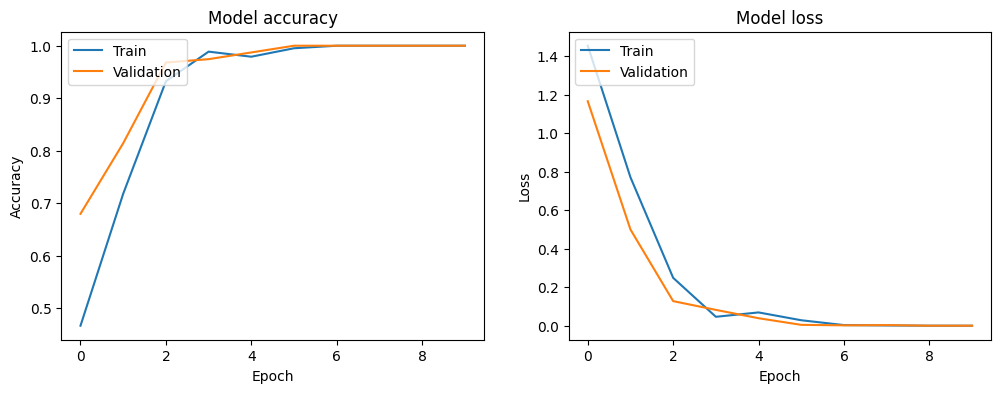

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
model.save('my_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
!cp my_model.h5 /content/drive/MyDrive/

In [ ]:
import pickle

# Assuming `model` is your trained model
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [ ]:
# Copy the model to Google Drive
!cp model.pkl /content/drive/MyDrive/

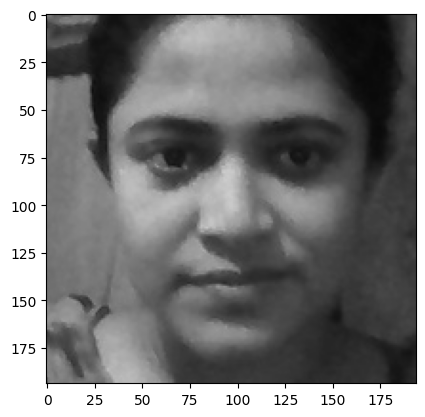

In [ ]:
real_img=cv2.imread('/content/extracted_files/students_data_set/Nipa/Nipa.20.1421.1.jpg')
plt.imshow(real_img)

In [ ]:
face_img= get_cropped_image_if_2_eyes('/content/extracted_files/students_data_set/Abir/Abir.20.1421.1.jpg')
if face_img is None:
  print("Face not found")
else:
    resized_image = cv2.resize(face_img, (128, 128))
    normalized_image = resized_image / 255.0

    input_image = np.expand_dims(normalized_image, axis=0)

    predictions = model.predict(input_image)
    predicted_class = np.argmax(predictions)
    if predicted_class==0:
      print("It is Sabiqul")
    elif predicted_class==1:
      print("It is Tamim")
    elif predicted_class==2:
      print("It is Tama")
    elif predicted_class==3:
      print("It is Hemel")
    elif predicted_class==4:
      print("It is Alia_Bhutt")
    elif predicted_class==5:
      print("It is Abir")
    elif predicted_class==6:
      print("It is Tarup")
    elif predicted_class==7:
      print("It is Fahim")
    elif predicted_class==8:
      print("It is Rupak")
    elif predicted_class==9:
      print("It is Nipa")
    else:
      print("Shepon")

1/1 [==============================] - 0s 31ms/step
It is Abir
